### PREDICTING THE OUTCOME OF FIFA 2022 MATCHES USING MACHINE LEARNING
##### AUTHOR: BABATUNDE RACHAEL

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
warnings.simplefilter("ignore", UserWarning)
warnings.filterwarnings("ignore")

In [2]:
#read the international matches csv file
FIFA = pd.read_csv("international_matches.csv")

In [3]:
#display the first five rows of fifa data frame
FIFA.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#exploring the data frame
FIFA.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [5]:
FIFA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

#ANALYSING FIFA RANKINGS BY TEAMS USING HOME AND AWAY TEAM RANKINGS

FIFA_RANK = FIFA[["date", "home_team", "home_team_fifa_rank", "away_team", 
                 "away_team_fifa_rank"]]

HOME = FIFA_RANK[["date", "home_team", "home_team_fifa_rank"]].rename(columns = {"home_team":"TEAM",
                                                                                 "home_team_fifa_rank":"RANK",
                                                                                "date":"DATE"})
AWAY = FIFA_RANK[["date", "away_team", "away_team_fifa_rank"]].rename(columns = {"away_team":"TEAM",
                                                                                "away_team_fifa_rank":"RANK",
                                                                                "date":"DATE"})

FIFA_RANK = pd.concat([HOME, AWAY])
FIFA_RANK.head()

#top countries by their rankings
FIFA_RANK = FIFA_RANK.sort_values(["TEAM", "DATE"], ascending  = [True, False])
FIFA_RANK_10 = FIFA_RANK.groupby("TEAM").first().sort_values('RANK', ascending = True)[0:10].reset_index()
FIFA_RANK_10

def get_flag(name):
    path = "C:\\Users\\Rhoda\\flags.jpg".format(name.title())
    im = plt.imread(path)
    return im


def offset_image(coord, name, ax):
    img = get_flag(name)
    im = OffsetImage(img, zoom = 0.05)
    im.image.axes = ax
    ab = AnnotationBbox(im, (coord, 0), xybox = (0., -16.), frameon = False, xycoords = "data",
                       boxcoords = "offset points", pad = 0)
    ax.add_artist(ab)

Countries = FIFA_RANK_10["TEAM"]
values = FIFA_RANK_10["RANK"]

fig, ax = plt.subplots()
ax.bar(range(len(Countries)), values, width = 0.5, align = "center")
ax.set_xticks(range(len(Countries)))
ax.set_xticklabels(Countries)
ax.tick_params(axis = "x", which = "major", pad = 26)

for i, c in enumerate(Countries):
    offset_image(i, c, ax)
plt.xticks(rotation = 90, fontsize = 13)
plt.show

#Winning percentage of best teams
def home_percentage(TEAM):
    score = len(FIFA[(FIFA["home_team"] == TEAM) & 
                     (FIFA["home_team_result"] == "win")]) / len(FIFA[FIFA["home_team"] == "TEAM"])
    return round(score)

def away_percentage(TEAM):
    score = len(FIFA[(FIFA["away_team"] == TEAM) & 
                     (FIFA["home_team_result"] == "loose")]) / len(FIFA[FIFA["away_team"] == "TEAM"])
    return round(score)
    

FIFA_RANK_10["Home_win_per"] = np.vectorize(home_percentage)(FIFA_RANK_10["TEAM"])
FIFA_RANK_10["Away_win_per"] = np.vectorize(away_percentage)(FIFA_RANK_10["TEAM"])
FIFA_RANK_10["Average_win_per"] = round((FIFA_RANK_10["Home_win_per"] + FIFA_RANK_10["Away_win_per"]) / 2)

FIFA_RANK_WIN = FIFA_RANK_10.sort_values("Average_win_per", ascending = False)
FIFA_RANK_WIN

FIFA_RANK_WIN_10 = FIFA_RANK_WIN.groupby("TEAM").first().sort_values("Average_win_per", ascending = False)[0:10].reset_index()
FIFA_RANK_WIN_10


In [6]:
FIFA.isnull().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

## This shows that 8 columns contain null values

### HOME AND AWAY GOALKEEPER SCORE

In [7]:
#Home team goalkeeper score summary
FIFA[FIFA["home_team"] == "Brazil"]["home_team_goalkeeper_score"].describe()

count    135.000000
mean      86.074074
std        3.327026
min       82.000000
25%       83.000000
50%       86.000000
75%       89.000000
max       93.000000
Name: home_team_goalkeeper_score, dtype: float64

In [8]:
FIFA[FIFA["away_team"] == "Guinea"]["away_team_goalkeeper_score"].describe()

count    53.000000
mean     60.415094
std       5.383143
min      52.000000
25%      58.000000
50%      58.000000
75%      66.000000
max      69.000000
Name: away_team_goalkeeper_score, dtype: float64

## EXPLORATORY DATA ANALYSIS

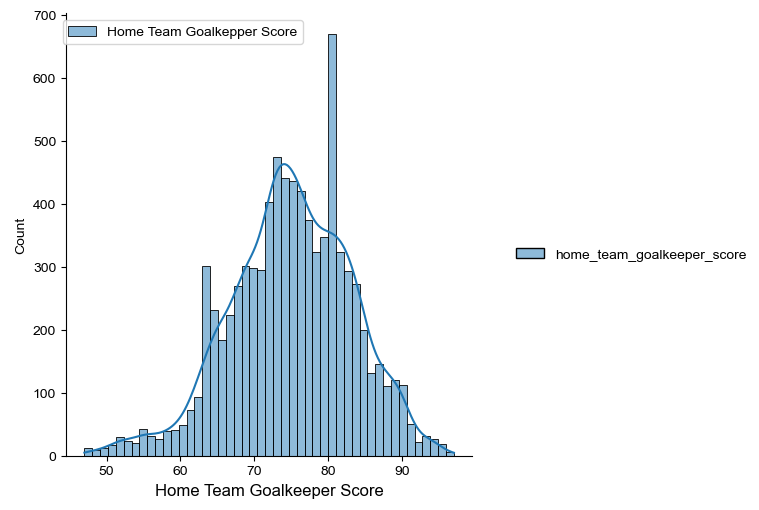

In [9]:
#Home team goalkeeper score
sb.displot(FIFA[["home_team_goalkeeper_score"]], kde = True ,color = "#404040", label = "Home Team Goalkepper Score")
plt.legend(bbox_to_anchor = (0.6, 1.0), loc = "best")
sb.set_style("white")
plt.xlabel("Home Team Goalkeeper Score", fontsize = 12)
plt.show()

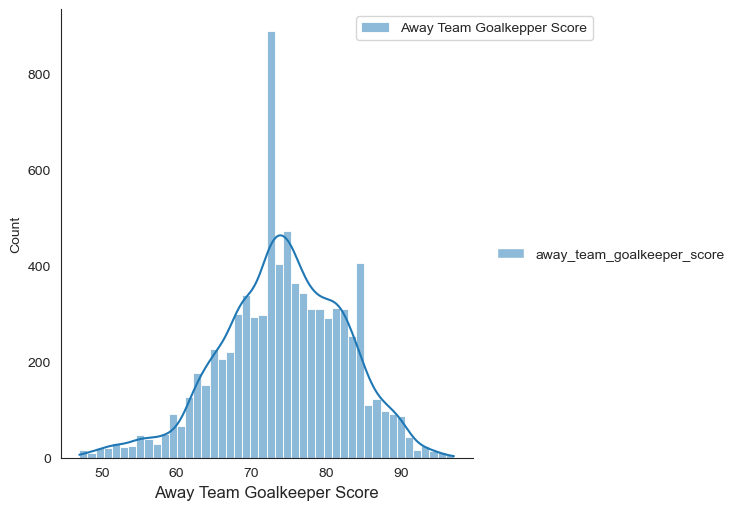

In [10]:
#Away team goalkeeper score
sb.displot(FIFA[["away_team_goalkeeper_score"]], kde = True ,color = "red", label = "Away Team Goalkepper Score")
plt.legend(bbox_to_anchor = (0.7, 1.0), loc = "best")
sb.set_style("white")
plt.xlabel("Away Team Goalkeeper Score", fontsize = 12)
plt.show()

In [11]:
#replace na's with mean in goal keeper score
FIFA["home_team_goalkeeper_score"] = round(FIFA.groupby("home_team")["home_team_goalkeeper_score"]
                                          .transform(lambda x: x.fillna(x.mean())))

FIFA["away_team_goalkepper_score"] = round(FIFA.groupby("away_team")["away_team_goalkeeper_score"]
                                          .transform(lambda x: x.fillna(x.mean())))

### HOME AND AWAY DEFENSE SCORE

In [12]:
FIFA[FIFA["home_team"] == "Uruguay"]["home_team_mean_defense_score"].describe()

count    85.000000
mean     79.788235
std       2.256072
min      75.500000
25%      78.500000
50%      79.200000
75%      82.500000
max      84.200000
Name: home_team_mean_defense_score, dtype: float64

In [13]:
FIFA[FIFA["away_team"] == "Ecuador"]["away_team_mean_defense_score"].describe()

count    102.000000
mean      70.776471
std        3.093819
min       64.500000
25%       69.000000
50%       70.500000
75%       73.500000
max       76.800000
Name: away_team_mean_defense_score, dtype: float64

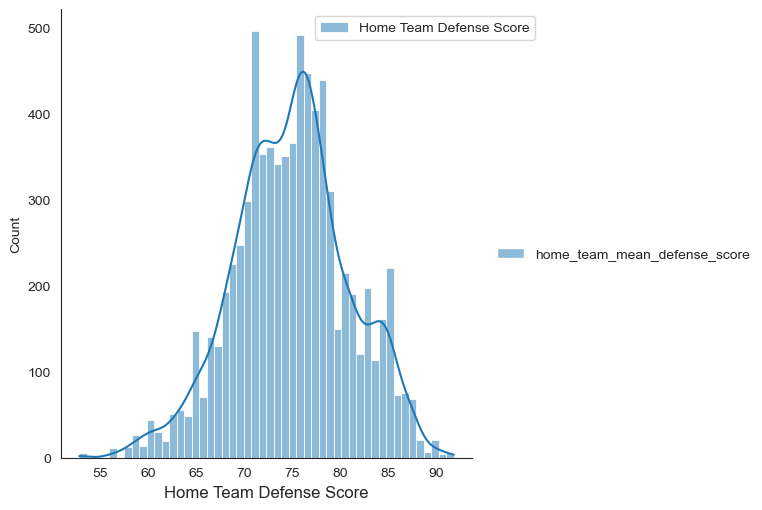

In [14]:
#Home team defense score
sb.displot(FIFA[["home_team_mean_defense_score"]], kde = True ,color = "#404040", label = "Home Team Defense Score")
plt.legend(bbox_to_anchor = (0.6, 1.0), loc = "best")
sb.set_style("white")
plt.xlabel("Home Team Defense Score", fontsize = 12)
plt.show()

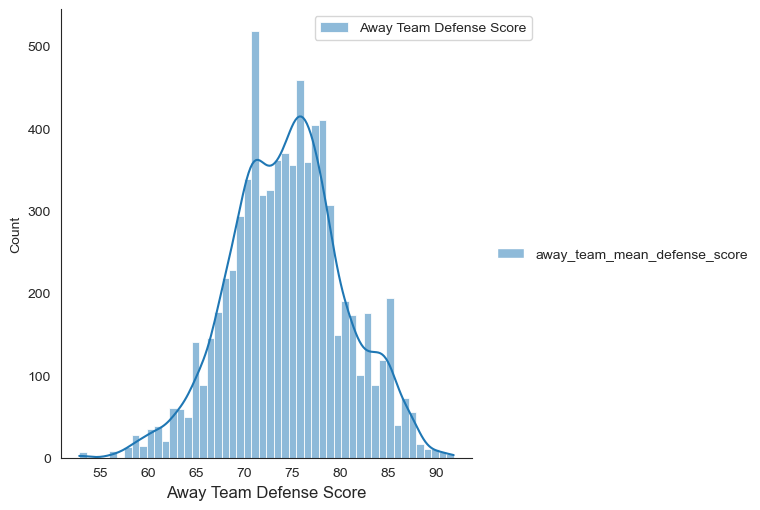

In [15]:
#Away team defense score
sb.displot(FIFA[["away_team_mean_defense_score"]], kde = True ,color = "#404040", label = "Away Team Defense Score")
plt.legend(bbox_to_anchor = (0.6, 1.0), loc = "best")
sb.set_style("white")
plt.xlabel("Away Team Defense Score", fontsize = 12)
plt.show()

### HOME AND AWAY OFFENSE SCORE

In [16]:
FIFA[FIFA["away_team"] == "Portugal"]["away_team_mean_offense_score"].describe()

count    104.000000
mean      84.887500
std        1.434775
min       81.000000
25%       84.300000
50%       84.700000
75%       86.000000
max       87.300000
Name: away_team_mean_offense_score, dtype: float64

In [17]:
FIFA[FIFA["home_team"] == "Italy"]["home_team_mean_offense_score"].describe()

count    133.000000
mean      85.132331
std        2.603859
min       81.700000
25%       83.300000
50%       84.700000
75%       86.700000
max       92.300000
Name: home_team_mean_offense_score, dtype: float64

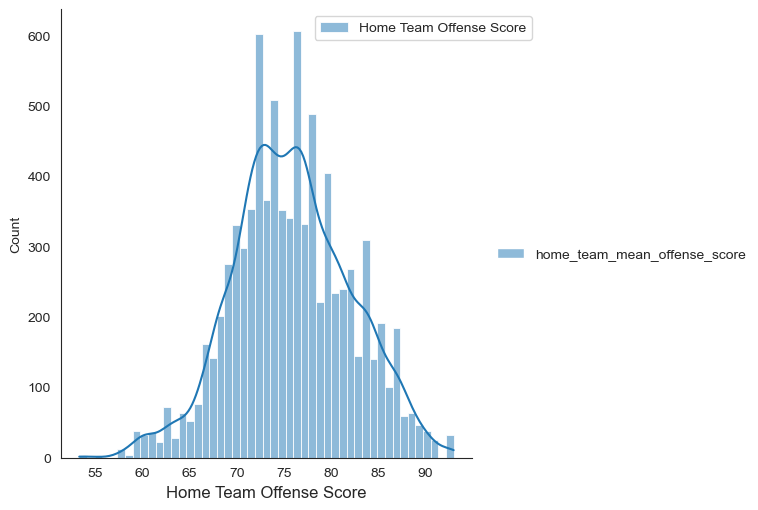

In [18]:
#Home team offense score
sb.displot(FIFA[["home_team_mean_offense_score"]], kde = True ,color = "#404040", label = "Home Team Offense Score")
plt.legend(bbox_to_anchor = (0.6, 1.0), loc = "best")
sb.set_style("white")
plt.xlabel("Home Team Offense Score", fontsize = 12)
plt.show()

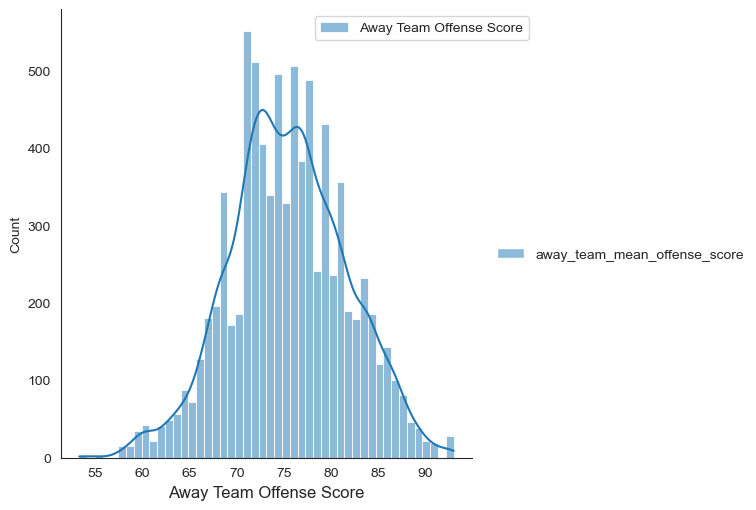

In [19]:
#Away team offense score
sb.displot(FIFA[["away_team_mean_offense_score"]], kde = True ,color = "#404040", label = "Away Team Offense Score")
plt.legend(bbox_to_anchor = (0.6, 1.0), loc = "best")
sb.set_style("white")
plt.xlabel("Away Team Offense Score", fontsize = 12)
plt.show()

### Midfield score

In [20]:
FIFA[FIFA["away_team"] == "France"]["away_team_mean_midfield_score"].describe()

count    93.000000
mean     86.138710
std       2.001034
min      84.200000
25%      84.500000
50%      85.200000
75%      87.000000
max      93.200000
Name: away_team_mean_midfield_score, dtype: float64

In [21]:
FIFA[FIFA["home_team"] == "Mexico"]["home_team_mean_midfield_score"].describe()

count    195.000000
mean      77.796410
std        1.972788
min       74.800000
25%       76.200000
50%       78.200000
75%       79.200000
max       81.200000
Name: home_team_mean_midfield_score, dtype: float64

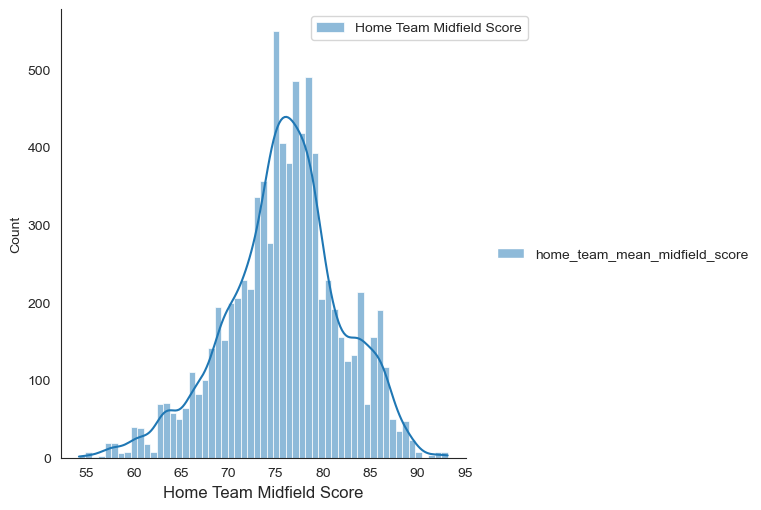

In [22]:
#Home team midfield score
sb.displot(FIFA[["home_team_mean_midfield_score"]], kde = True ,color = "#404040", label = "Home Team Midfield Score")
plt.legend(bbox_to_anchor = (0.6, 1.0), loc = "best")
sb.set_style("white")
plt.xlabel("Home Team Midfield Score", fontsize = 12)
plt.show()

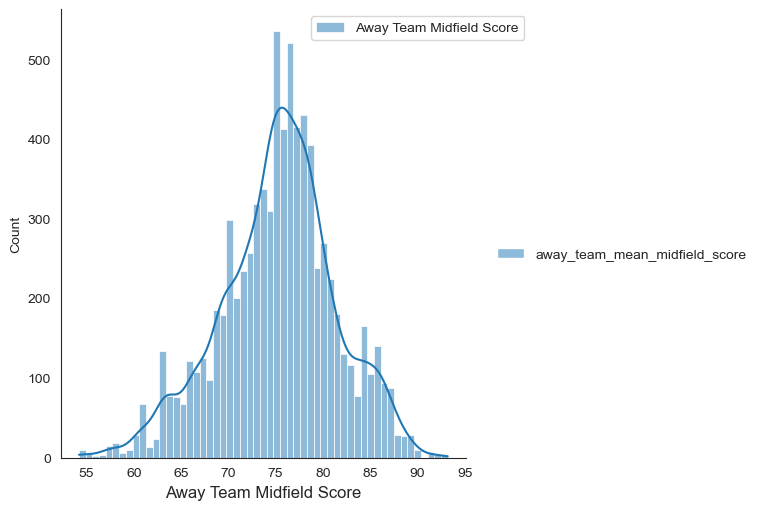

In [23]:
#Away team midfield score
sb.displot(FIFA[["away_team_mean_midfield_score"]], kde = True ,color = "#404040", label = "Away Team Midfield Score")
plt.legend(bbox_to_anchor = (0.6, 1.0), loc = "best")
sb.set_style("white")
plt.xlabel("Away Team Midfield Score", fontsize = 12)
plt.show()

In [24]:
#replace na's with mean in midfield score
FIFA["home_team_mean_midfield_score"] = round(FIFA.groupby("home_team")["home_team_mean_midfield_score"]
                                          .transform(lambda x: x.fillna(x.mean())))

FIFA["away_team_mean_midfield_score"] = round(FIFA.groupby("away_team")["away_team_mean_midfield_score"]
                                          .transform(lambda x: x.fillna(x.mean())))

### PARTICIPANTS OF FIFA 2022

In [25]:
list_2022 = ["Qatar", "Germany", "Denmark", "Brazil", "France", "Belgium", "Croatia", "Spain",
            "England", "Switzerland", "Netherlands", "Argentina", " IR Iran", "Korea Republic", "Serbia", "Japan",
            "Saudi Arabia", "Ecuador", "Uruguay", "Canada", "Senegal", "Ghana", "Portugal", "Poland",
            "Tunisia", "Morocco", "Cameroon", "USA", "Mexico", "Wales", "Australia", "Costa Rica"]
FINALS_FIFA = FIFA[(FIFA["home_team"].apply(lambda x: x in list_2022)) | (FIFA["away_team"]
                                                                         .apply(lambda x: x in list_2022))]

### TOP RANK TEAMS FOR FIFA 2022

#ANALYSING FIFA RANKINGS BY TEAMS USING HOME AND AWAY TEAM RANKINGS

RANK = FINALS_FIFA[["date", "home_team", "home_team_fifa_rank", "away_team", 
                 "away_team_fifa_rank"]]

HOME = RANK[["date", "home_team", "home_team_fifa_rank"]].rename(columns = {"home_team":"TEAM",
                                                                                 "home_team_fifa_rank":"RANK",
                                                                                "date":"DATE"})
AWAY = RANK[["date", "away_team", "away_team_fifa_rank"]].rename(columns = {"away_team":"TEAM",
                                                                                "away_team_fifa_rank":"RANK",
                                                                                "date":"DATE"})

RANK = pd.concat([HOME, AWAY])
RANK

### Dropping unnecessary columns

In [26]:
FINALS_FIFA = FINALS_FIFA.drop(["date", "home_team_continent", "away_team_continent", "home_team_total_fifa_points",
                                "away_team_total_fifa_points", "home_team_score", "away_team_score", "tournament", "city", "country",
                               "neutral_location", "shoot_out", "away_team_goalkepper_score"], axis = 1)

FINALS_FIFA.columns

Index(['home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_result', 'home_team_goalkeeper_score',
       'away_team_goalkeeper_score', 'home_team_mean_defense_score',
       'home_team_mean_offense_score', 'home_team_mean_midfield_score',
       'away_team_mean_defense_score', 'away_team_mean_offense_score',
       'away_team_mean_midfield_score'],
      dtype='object')

In [27]:
FINALS_FIFA["home_team_result"] = FINALS_FIFA["home_team_result"].map({"Win" :1, "Draw" :2, "Lose" :0})

In [28]:
#rename column names
FINALS_FIFA.rename(columns = {"home_team":"Team 1", "away_team":"Team 2", "home_team_fifa_rank":"Team1_fifa_rank", 
                              "away_team_fifa_rank":"Team2_fifa_rank", "home_team_result":"Team1_result", 
                              "away_team_result":"Team2_result", "home_team_goalkeeper_score":"Team1_goalkeeper_score", 
                              "away_team_goalkeeper_score":"Team2_goalkeeper_score", 
                              "home_team_mean_defense_score":"Team1_defense",
                              "away_team_mean_defense_score":"Team2_defense",
                              "home_team_mean_offense_score":"Team1_offense", 
                              "away_team_mean_offense_score":"Team2_offense", 
                              "home_team_mean_midfield_score":"Team1_midfield",
                             "away_team_mean_midfield_score":"Team2_midfield"}, inplace = True)

### HEATMAP

In [29]:
FINALS_FIFA = FINALS_FIFA.dropna()

<Axes: >

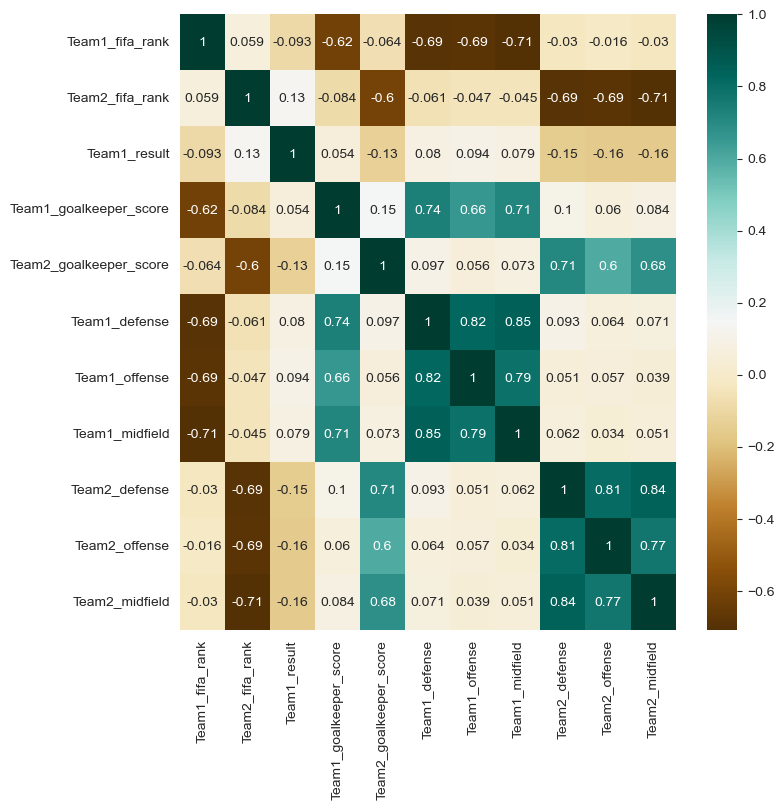

In [30]:
plt.figure(figsize = (8, 8), dpi = 100)
sb.heatmap(FINALS_FIFA.corr(), annot = True, cmap = "BrBG")

In [31]:
FINALS_FIFA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3248 entries, 8264 to 23918
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Team 1                  3248 non-null   object 
 1   Team 2                  3248 non-null   object 
 2   Team1_fifa_rank         3248 non-null   int64  
 3   Team2_fifa_rank         3248 non-null   int64  
 4   Team1_result            3248 non-null   int64  
 5   Team1_goalkeeper_score  3248 non-null   float64
 6   Team2_goalkeeper_score  3248 non-null   float64
 7   Team1_defense           3248 non-null   float64
 8   Team1_offense           3248 non-null   float64
 9   Team1_midfield          3248 non-null   float64
 10  Team2_defense           3248 non-null   float64
 11  Team2_offense           3248 non-null   float64
 12  Team2_midfield          3248 non-null   float64
dtypes: float64(8), int64(3), object(2)
memory usage: 355.2+ KB


In [32]:
FINALS_FIFA.to_csv("Data.csv")

In [33]:
FINALS_FIFA = pd.read_csv("Data.csv")
FINALS_FIFA.tail()

,Unnamed: 0,Team 1,Team 2,Team1_fifa_rank,Team2_fifa_rank,Team1_result,Team1_goalkeeper_score,Team2_goalkeeper_score,Team1_defense,Team1_offense,Team1_midfield,Team2_defense,Team2_offense,Team2_midfield
3243,23906,England,Hungary,5,40,0,83.0,85.0,85.0,88.0,84.0,75.5,72.7,73.0
3244,23907,Germany,Italy,12,6,1,90.0,89.0,84.0,82.7,88.0,84.2,85.3,84.0
3245,23908,Netherlands,Wales,10,18,1,81.0,74.0,85.2,83.0,84.0,75.0,73.0,78.0
3246,23909,Poland,Belgium,26,2,0,87.0,89.0,75.2,84.7,76.0,80.8,85.7,86.0
3247,23918,Chile,Ghana,28,60,0,79.0,74.0,75.5,76.7,78.0,75.5,76.0,78.0


In [34]:
FINALS_FIFA = FINALS_FIFA.drop("Unnamed: 0", axis = 1)

In [35]:
#data frame for pipline
PIPELINE_FIFA = FINALS_FIFA

## TASK 4 MODEL SELECTION AND TRAINING

## MACHINE LEARNING MODEL

### LEAGUE MODEL

In [36]:
#create dummies for categorical columns to derive the best model accuracy
FINALS_FIFA = pd.get_dummies(FINALS_FIFA)

### TRAIN AND TEST SPILT OF DATA

In [37]:
x = FINALS_FIFA.drop("Team1_result", axis = 1)
y = FINALS_FIFA["Team1_result"]

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.1, random_state = 42)

#validation and test set
x_hold_test, x_test, y_hold_test, y_test = train_test_split(x_val, y_val, test_size = 0.5, random_state = 42)

In [39]:
#Normalizing 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_hold_test = scaler.transform(x_hold_test)

### MODELLLING

In [40]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
def metrics_display(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.30      0.34      0.32        38
           1       0.58      0.62      0.60        84
           2       0.30      0.22      0.25        41

    accuracy                           0.45       163
   macro avg       0.39      0.39      0.39       163
weighted avg       0.45      0.45      0.45       163



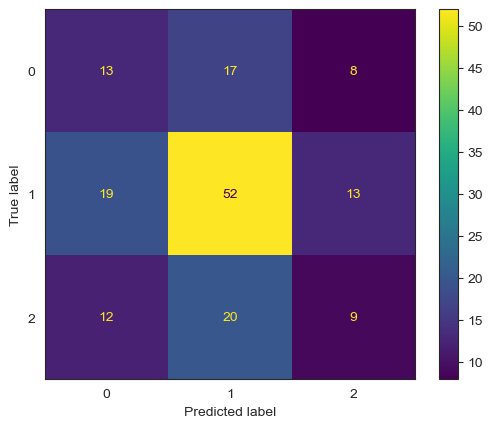

In [41]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
metrics_display(DecisionTreeClassifier())

              precision    recall  f1-score   support

           0       0.38      0.42      0.40        38
           1       0.62      0.79      0.69        84
           2       0.43      0.15      0.22        41

    accuracy                           0.54       163
   macro avg       0.48      0.45      0.44       163
weighted avg       0.51      0.54      0.50       163



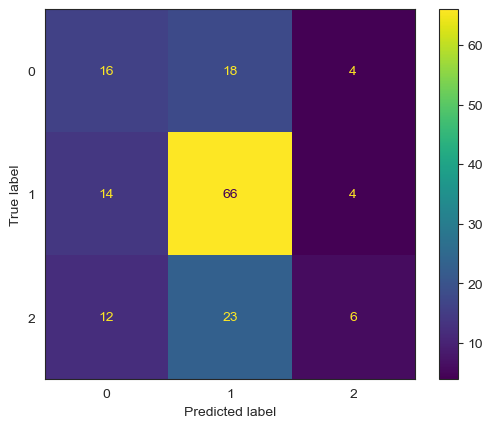

In [42]:
##Random Forest
from sklearn.ensemble import RandomForestClassifier
metrics_display(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.31      0.37      0.34        38
           1       0.65      0.79      0.71        84
           2       0.41      0.17      0.24        41

    accuracy                           0.53       163
   macro avg       0.46      0.44      0.43       163
weighted avg       0.51      0.53      0.51       163



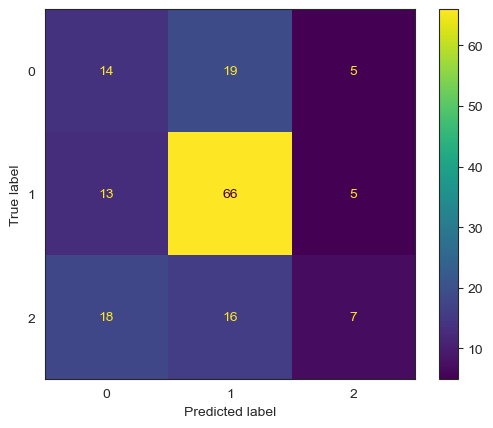

In [43]:
#Ada Boost Classifier
from sklearn.ensemble import AdaBoostClassifier
metrics_display(AdaBoostClassifier())

              precision    recall  f1-score   support

           0       0.35      0.42      0.38        38
           1       0.60      0.71      0.65        84
           2       0.24      0.10      0.14        41

    accuracy                           0.49       163
   macro avg       0.39      0.41      0.39       163
weighted avg       0.45      0.49      0.46       163



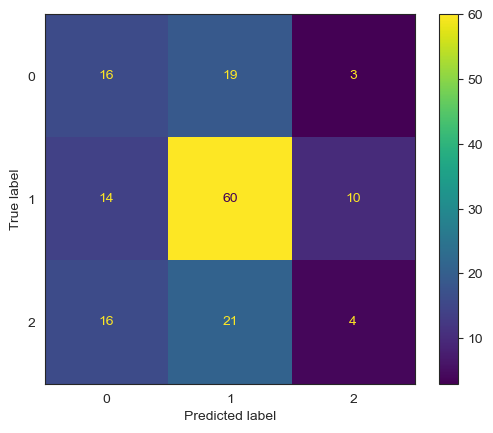

In [44]:
#XGB Boost
from xgboost import XGBClassifier
metrics_display(XGBClassifier(use_label_encoder = False))

              precision    recall  f1-score   support

           0       0.44      0.44      0.44        54
           1       0.51      0.71      0.59        68
           2       0.21      0.07      0.11        40

    accuracy                           0.46       162
   macro avg       0.39      0.41      0.38       162
weighted avg       0.42      0.46      0.42       162



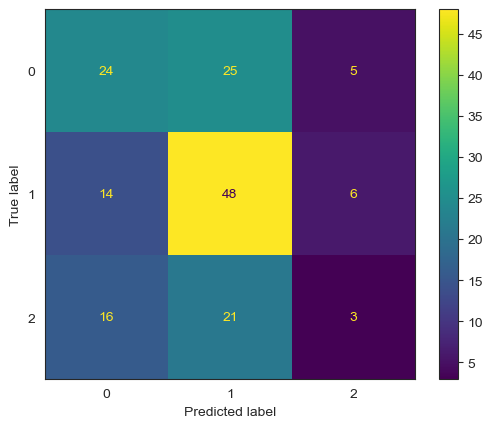

In [45]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_hold_test)
print(classification_report(y_hold_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test, y_pred)

### HYPERPARAMETER TUNING

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
#creating a dictionary of hyperparameter values to search
search_space = {
    "n_estimators" :[300, 330],
    "max_depth" : [4],
    "gamma" :[0.01],
    "learning_rate" :[0.01]
}
#make a gridsearchcv obj
grid_search = GridSearchCV(estimator = XGBClassifier(use_label_encoder = False),
                          param_grid = search_space,
                          scoring = "accuracy",
                          cv = 5,
                          verbose = 4)


In [47]:
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END gamma=0.01, learning_rate=0.01, max_depth=4, n_estimators=300;, score=0.530 total time=  15.4s
[CV 2/5] END gamma=0.01, learning_rate=0.01, max_depth=4, n_estimators=300;, score=0.545 total time=   9.6s
[CV 3/5] END gamma=0.01, learning_rate=0.01, max_depth=4, n_estimators=300;, score=0.549 total time=   9.1s
[CV 4/5] END gamma=0.01, learning_rate=0.01, max_depth=4, n_estimators=300;, score=0.546 total time=  10.5s
[CV 5/5] END gamma=0.01, learning_rate=0.01, max_depth=4, n_estimators=300;, score=0.517 total time=   6.2s
[CV 1/5] END gamma=0.01, learning_rate=0.01, max_depth=4, n_estimators=330;, score=0.530 total time=   9.6s
[CV 2/5] END gamma=0.01, learning_rate=0.01, max_depth=4, n_estimators=330;, score=0.547 total time=   5.8s
[CV 3/5] END gamma=0.01, learning_rate=0.01, max_depth=4, n_estimators=330;, score=0.554 total time=  10.1s
[CV 4/5] END gamma=0.01, learning_rate=0.01, max_depth=4, n_estimators=330;,

#### XGBClassifer using hyperparameter

              precision    recall  f1-score   support

           0       0.35      0.42      0.38        38
           1       0.60      0.71      0.65        84
           2       0.24      0.10      0.14        41

    accuracy                           0.49       163
   macro avg       0.39      0.41      0.39       163
weighted avg       0.45      0.49      0.46       163



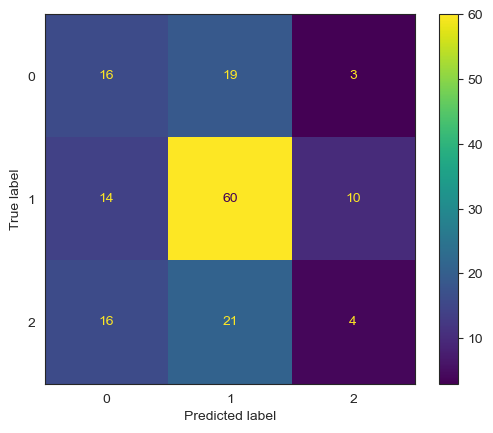

In [48]:
model = XGBClassifier(use_label_encoder = False, gamma = 0.01, learning_rate = 0.01,
                     n_estimators = 300, max_depth = 4)
metrics_display(XGBClassifier(use_label_encoder = False))

              precision    recall  f1-score   support

           0       0.50      0.54      0.52        54
           1       0.55      0.84      0.67        68
           2       1.00      0.03      0.05        40

    accuracy                           0.54       162
   macro avg       0.68      0.47      0.41       162
weighted avg       0.65      0.54      0.46       162



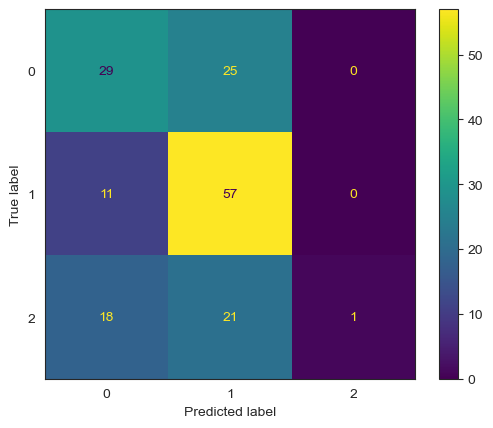

In [49]:
#XGBoost Classifier with hyperparameters on validation holdout dataset
model = XGBClassifier(use_label_encoder = False, gamma = 0.01, learning_rate = 0.01,
                     n_estimators = 300, max_depth = 4)

model.fit(x_train, y_train)
y_pred = model.predict(x_hold_test)
print(classification_report(y_hold_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test, y_pred)

### PIPELINE

In [50]:
##create pipeline for league matches
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
column_trans = make_column_transformer(
(OneHotEncoder(), ["Team 1", "Team 2"]), remainder = "passthrough")

In [51]:
FIFA_X = PIPELINE_FIFA.drop("Team1_result", axis = 1)
FIFA_Y = PIPELINE_FIFA["Team1_result"]

In [52]:
FIFA_X

,Team 1,Team 2,Team1_fifa_rank,Team2_fifa_rank,Team1_goalkeeper_score,Team2_goalkeeper_score,Team1_defense,Team1_offense,Team1_midfield,Team2_defense,Team2_offense,Team2_midfield
0,Spain,Scotland,3,67,94.0,84.0,86.5,89.3,90.0,80.2,79.7,82.0
1,Austria,England,90,7,83.0,88.0,76.2,73.0,74.0,90.5,88.7,91.0
2,Croatia,Hungary,25,76,77.0,74.0,80.5,78.7,79.0,71.8,75.7,70.0
3,Morocco,Tunisia,33,36,68.0,51.0,75.2,73.7,71.0,67.5,71.0,72.0
4,Northern Ireland,Poland,109,29,84.0,83.0,71.8,65.7,75.0,78.0,80.3,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3243,England,Hungary,5,40,83.0,85.0,85.0,88.0,84.0,75.5,72.7,73.0
3244,Germany,Italy,12,6,90.0,89.0,84.0,82.7,88.0,84.2,85.3,84.0
3245,Netherlands,Wales,10,18,81.0,74.0,85.2,83.0,84.0,75.0,73.0,78.0
3246,Poland,Belgium,26,2,87.0,89.0,75.2,84.7,76.0,80.8,85.7,86.0


In [53]:
FIFA_Y

0       2
1       2
2       1
3       2
4       0
       ..
3243    0
3244    1
3245    1
3246    0
3247    0
Name: Team1_result, Length: 3248, dtype: int64

### LEAGUE MODEL

In [54]:
from sklearn.pipeline import make_pipeline
pipe_league = make_pipeline(column_trans, StandardScaler(with_mean = False), 
                            XGBClassifier(use_label_encoder = False, gamma = 0.01, learning_rate = 0.01, 
                                          n_estimators = 300, max_depth = 4))
pipe_league.fit(FIFA_X, FIFA_Y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Team 1', 'Team 2'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_sto...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=300,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [55]:
##SAVE THE LEAGUE MODEL
import joblib
joblib.dump(pipe_league, "League_model.pkl")

['League_model.pkl']

### KNOCKOUT MODEL

In [56]:
##predictions for knockout stage
KNOCK_FIFA = PIPELINE_FIFA[PIPELINE_FIFA["Team1_result"] != 2]
PIPE_KNOCK_DF = KNOCK_FIFA
KNOCK_FIFA = pd.get_dummies(KNOCK_FIFA)
X = KNOCK_FIFA.drop("Team1_result", axis = 1)
Y = KNOCK_FIFA["Team1_result"]

In [57]:
#Train, test, validation split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2, random_state = 42)
x_hold_test, x_test, y_hold_test, y_test = train_test_split(x_val, y_val, test_size = 0.2, random_state = 42)

### MODELLING

              precision    recall  f1-score   support

           0       0.64      0.60      0.62        30
           1       0.83      0.85      0.84        68

    accuracy                           0.78        98
   macro avg       0.74      0.73      0.73        98
weighted avg       0.77      0.78      0.77        98



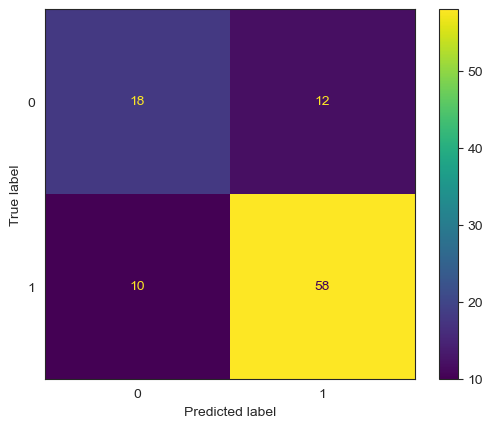

In [58]:
#Random Forest classifier
metrics_display(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.62      0.60      0.61        30
           1       0.83      0.84      0.83        68

    accuracy                           0.77        98
   macro avg       0.72      0.72      0.72        98
weighted avg       0.76      0.77      0.76        98



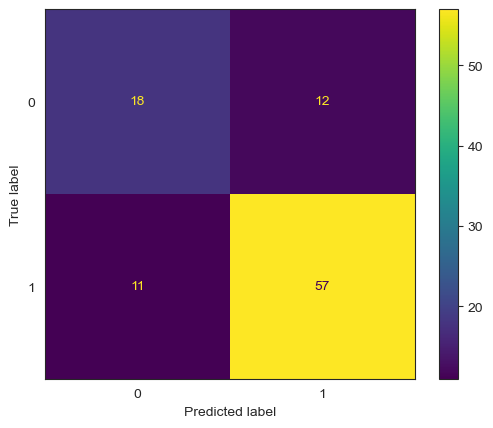

In [59]:
#AdaBoost Classifier
metrics_display(AdaBoostClassifier())

              precision    recall  f1-score   support

           0       0.54      0.63      0.58        30
           1       0.83      0.76      0.79        68

    accuracy                           0.72        98
   macro avg       0.68      0.70      0.69        98
weighted avg       0.74      0.72      0.73        98



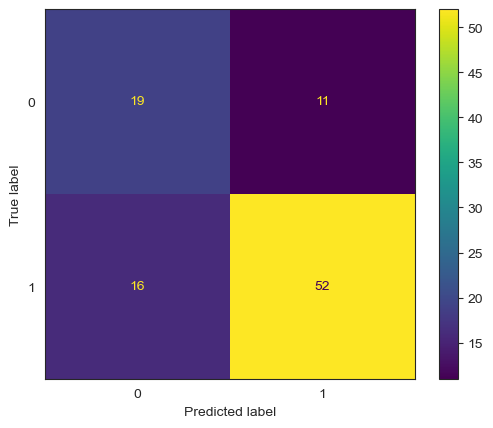

In [60]:
#XGBoost classifier
metrics_display(XGBClassifier(use_label_encoder = False))

              precision    recall  f1-score   support

           0       0.67      0.61      0.64       155
           1       0.76      0.80      0.78       236

    accuracy                           0.72       391
   macro avg       0.71      0.70      0.71       391
weighted avg       0.72      0.72      0.72       391



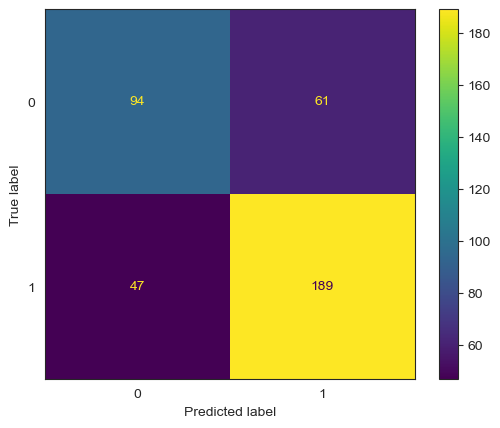

In [61]:
#testing the hold out test  and finalizing  the model on random forest and XGBoost
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_hold_test)
print(classification_report(y_hold_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test, y_pred)

              precision    recall  f1-score   support

           0       0.67      0.62      0.64       155
           1       0.76      0.80      0.78       236

    accuracy                           0.73       391
   macro avg       0.71      0.71      0.71       391
weighted avg       0.72      0.73      0.72       391



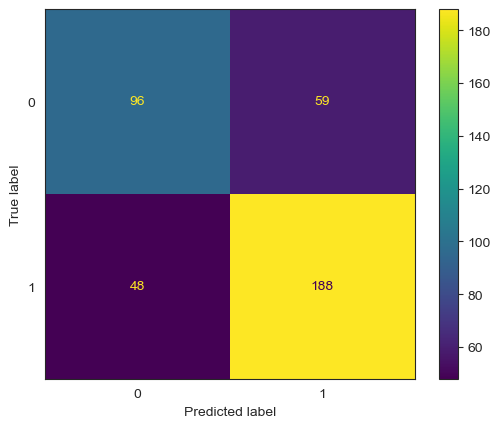

In [62]:
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_hold_test)
print(classification_report(y_hold_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test, y_pred)

### HYPERPARAMETER TUNING

In [63]:
#creating a dictionary of hyperparameter values to search
search_space = {
    "n_estimators" :[500],
    "max_depth" : [5],
    "gamma" :[0.01],
    "learning_rate" :[0.001, 0.01]
}
#make a gridsearchcv obj
grid_search = GridSearchCV(estimator = XGBClassifier(use_label_encoder = False),
                          param_grid = search_space,
                          scoring = "accuracy",
                          cv = 5,
                          verbose = 4)


In [64]:
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=5, n_estimators=500;, score=0.698 total time=   6.2s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=5, n_estimators=500;, score=0.711 total time=   4.7s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=5, n_estimators=500;, score=0.700 total time=   3.4s
[CV 4/5] END gamma=0.01, learning_rate=0.001, max_depth=5, n_estimators=500;, score=0.672 total time=   3.8s
[CV 5/5] END gamma=0.01, learning_rate=0.001, max_depth=5, n_estimators=500;, score=0.718 total time=   6.3s
[CV 1/5] END gamma=0.01, learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.698 total time=   3.6s
[CV 2/5] END gamma=0.01, learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.714 total time=   3.5s
[CV 3/5] END gamma=0.01, learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.705 total time=   4.7s
[CV 4/5] END gamma=0.01, learning_rate=0.01, max_depth=5, n_estimators=

              precision    recall  f1-score   support

           0       0.70      0.60      0.65       155
           1       0.76      0.83      0.79       236

    accuracy                           0.74       391
   macro avg       0.73      0.72      0.72       391
weighted avg       0.74      0.74      0.73       391



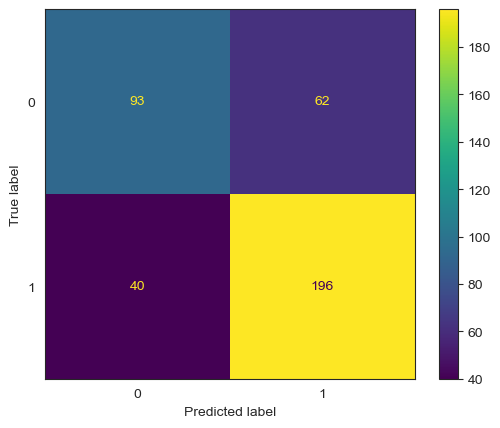

In [65]:
#XGBoost Classifier with hyperparameters on test data set
model = XGBClassifier(gamma = 0.01, learning_rate = 0.01,
                     n_estimators = 500, max_depth = 4)
model.fit(x_train, y_train)
y_pred = model.predict(x_hold_test)
print(classification_report(y_hold_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test, y_pred)

In [66]:
FIFA_KNOCK_X = PIPE_KNOCK_DF.drop("Team1_result", axis = 1)
FIFA_KNOCK_Y = PIPE_KNOCK_DF["Team1_result"]
pipe_knock =  make_pipeline(column_trans, StandardScaler(with_mean = False), 
                            RandomForestClassifier())
pipe_knock.fit(FIFA_KNOCK_X, FIFA_KNOCK_Y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Team 1', 'Team 2'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('randomforestclassifier', RandomForestClassifier())])

In [67]:
pipe_knock.predict_proba(FIFA_KNOCK_X)

array([[0.04, 0.96],
       [0.94, 0.06],
       [0.11, 0.89],
       ...,
       [0.01, 0.99],
       [0.91, 0.09],
       [0.65, 0.35]])

In [68]:
joblib.dump(pipe_knock, "knockout_model.pkl")

['knockout_model.pkl']

In [69]:
joblib.dump(FIFA_KNOCK_X.columns, "col_names.pkl")

['col_names.pkl']

In [70]:
league_model = joblib.load("league_model.pkl")
knockout_model = joblib.load("knockout_model.pkl")
colnames = joblib.load("col_names.pkl")

### THE LEARNING CURVE FOR LEAGUE MODEL

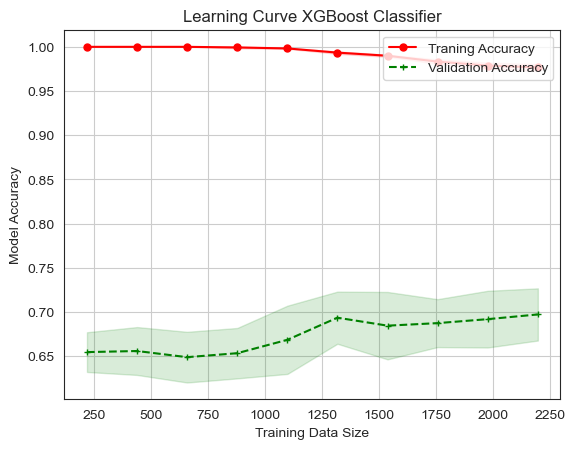

In [71]:
#learning curve league model XGBoost Classifier
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator = XGBClassifier(), X = X, y =Y,
                                                       cv = 10, train_sizes = np.linspace(0.1, 1.0, 10, 50),
                                                       n_jobs = 1)
##calculated training and test mean and std
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

#plot the learning curve
plt.plot(train_sizes, train_mean, color = "red", marker = "o", markersize = 5, label = "Traning Accuracy")
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = "red")

plt.plot(train_sizes, test_mean, color = "green", marker = "+", markersize = 5, linestyle = "--", label = "Validation Accuracy")
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = "green")
plt.title("Learning Curve XGBoost Classifier")
plt.xlabel("Training Data Size")
plt.ylabel("Model Accuracy")
plt.grid()
plt.legend(loc = "upper right")
plt.show()

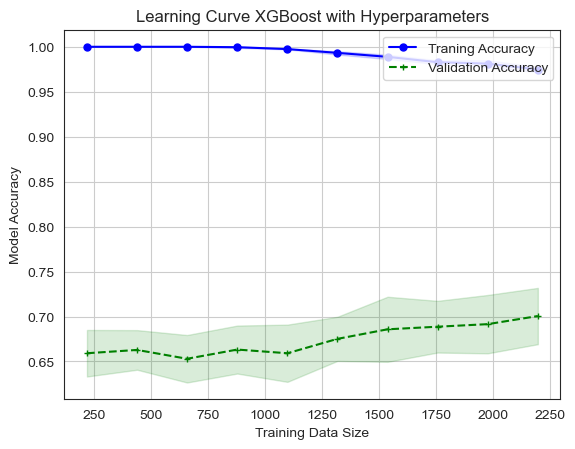

In [72]:
#learning curve league model XGBoost Classifier with hyperparameter
train_sizes, train_scores, test_scores = learning_curve(estimator = XGBClassifier(use_label_encoder = False, gamma = 0.01),
                                                        X = X, y =Y, cv = 10, train_sizes = np.linspace(0.1, 1.0, 10, 10),
                                                       n_jobs = 1)
##calculated training and test mean and std
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

#plot the learning curve
plt.plot(train_sizes, train_mean, color = "blue", marker = "o", markersize = 5, label = "Traning Accuracy")
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = "blue")

plt.plot(train_sizes, test_mean, color = "green", marker = "+", markersize = 5, linestyle = "--", label = "Validation Accuracy")
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = "green")
plt.title("Learning Curve XGBoost with Hyperparameters")
plt.xlabel("Training Data Size")
plt.ylabel("Model Accuracy")
plt.grid()
plt.legend(loc = "upper right")
plt.show()

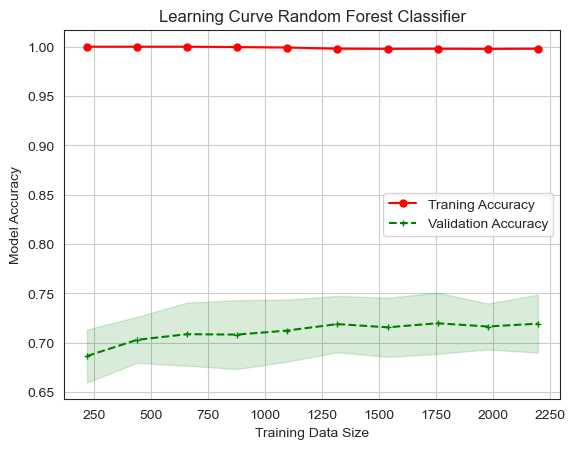

In [73]:
#learning curve league model RandomForest Classifier
train_sizes, train_scores, test_scores = learning_curve(estimator = RandomForestClassifier(), X = X, y =Y,
                                                       cv = 10, train_sizes = np.linspace(0.1, 1.0, 10, 50),
                                                       n_jobs = 1)
##calculated training and test mean and std
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

#plot the learning curve
plt.plot(train_sizes, train_mean, color = "red", marker = "o", markersize = 5, label = "Traning Accuracy")
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = "red")

plt.plot(train_sizes, test_mean, color = "green", marker = "+", markersize = 5, linestyle = "--", label = "Validation Accuracy")
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = "green")
plt.title("Learning Curve Random Forest Classifier")
plt.xlabel("Training Data Size")
plt.ylabel("Model Accuracy")
plt.grid()
plt.legend(loc = "center right")
plt.show()

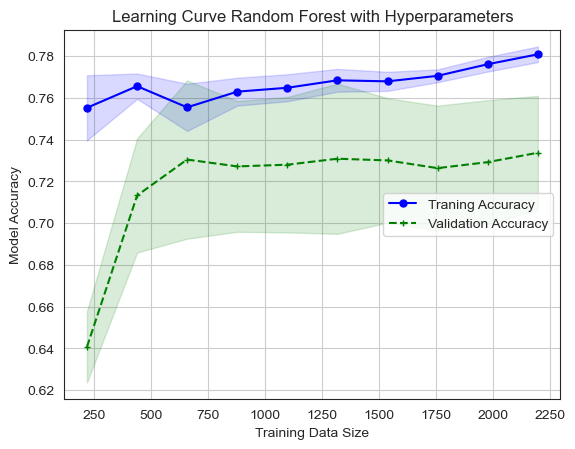

In [74]:
#learning curve league model Random Forest Classifier with hyperparameter
train_sizes, train_scores, test_scores = learning_curve(estimator = RandomForestClassifier(max_depth = 15, 
                                                                                           n_estimators = 320, 
                                                                                           max_leaf_nodes = 190, 
                                                                                           min_samples_leaf =5),
                                                        X = X, y =Y, cv = 10, 
                                                        train_sizes = np.linspace(0.1, 1.0, 10, 10), n_jobs = 1)
##calculated training and test mean and std
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

#plot the learning curve
plt.plot(train_sizes, train_mean, color = "blue", marker = "o", markersize = 5, label = "Traning Accuracy")
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = "blue")

plt.plot(train_sizes, test_mean, color = "green", marker = "+", markersize = 5, linestyle = "--", label = "Validation Accuracy")
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = "green")
plt.title("Learning Curve Random Forest with Hyperparameters")
plt.xlabel("Training Data Size")
plt.ylabel("Model Accuracy")
plt.grid()
plt.legend(loc = "center right")
plt.show()

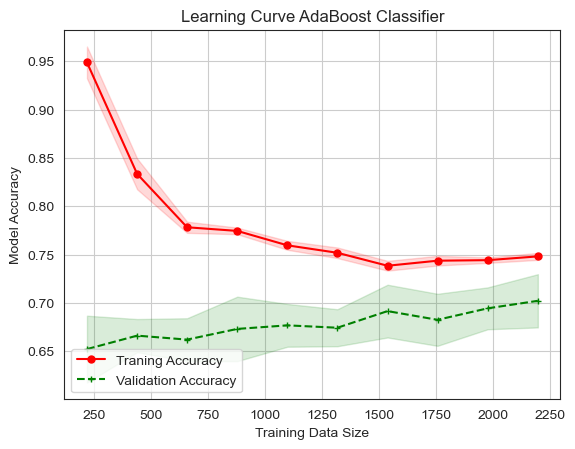

In [75]:
#learning curve league model AdaBoost Classifier
train_sizes, train_scores, test_scores = learning_curve(estimator = AdaBoostClassifier(), X = X, y =Y,
                                                       cv = 10, train_sizes = np.linspace(0.1, 1.0, 10, 10),
                                                       n_jobs = 1)
##calculated training and test mean and std
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

#plot the learning curve
plt.plot(train_sizes, train_mean, color = "red", marker = "o", markersize = 5, label = "Traning Accuracy")
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = "red")

plt.plot(train_sizes, test_mean, color = "green", marker = "+", markersize = 5, linestyle = "--", label = "Validation Accuracy")
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = "green")
plt.title("Learning Curve AdaBoost Classifier")
plt.xlabel("Training Data Size")
plt.ylabel("Model Accuracy")
plt.grid()
plt.legend(loc = "lower left")
plt.show()

### SIMULATIONS TO PREDICT THE WINNER OF FIFA 2022

In [76]:
FIFA = FIFA.dropna()

In [78]:
#Generating a dataset to predict winner
FIFA_RANKINGS22 = FIFA[['date', 'home_team', 'away_team', 'home_team_fifa_rank', 
                        'away_team_fifa_rank','home_team_goalkeeper_score', 'away_team_goalkeeper_score',
                        'home_team_mean_defense_score', 'home_team_mean_offense_score',
                        'home_team_mean_midfield_score', 'away_team_mean_defense_score',
                        'away_team_mean_offense_score', 'away_team_mean_midfield_score']]

In [79]:
HOME = FIFA_RANKINGS22[["date", "home_team", "home_team_fifa_rank", 'home_team_goalkeeper_score',
                      'home_team_mean_defense_score','home_team_mean_offense_score','home_team_mean_midfield_score'
                      ]].rename(columns = {"home_team":"TEAM","home_team_fifa_rank":"RANK",
                                          'home_team_goalkeeper_score' :'GOALKEEPER_SCORE', 
                                           'home_team_mean_defense_score' :'DEFENSE_SCORE',
                                           'home_team_mean_offense_score' :'OFFENSE_SCORE',
                                           'home_team_mean_midfield_score' :'MIDFIELD_SCORE' })

In [80]:
AWAY = FIFA_RANKINGS22[["date", "away_team", "away_team_fifa_rank", 'away_team_goalkeeper_score',
                      'away_team_mean_defense_score','away_team_mean_offense_score','away_team_mean_midfield_score',
                       ]].rename(columns = {"away_team":"TEAM","away_team_fifa_rank":"RANK",
                                          'away_team_goalkeeper_score' :'GOALKEEPER_SCORE', 
                                           'away_team_mean_defense_score' :'DEFENSE_SCORE',
                                           'away_team_mean_offense_score' :'OFFENSE_SCORE',
                                           'away_team_mean_midfield_score' :'MIDFIELD_SCORE' })

In [81]:
FIFA_RANKINGS22 = pd.concat([HOME, AWAY])
FIFA_RANKINGS22.head()

,date,TEAM,RANK,GOALKEEPER_SCORE,DEFENSE_SCORE,OFFENSE_SCORE,MIDFIELD_SCORE
8264,2004-09-03,Spain,3,94.0,86.5,89.3,90.0
8266,2004-09-04,Austria,90,83.0,76.2,73.0,74.0
8271,2004-09-04,Croatia,25,77.0,80.5,78.7,79.0
8276,2004-09-04,Iceland,80,78.0,68.8,77.0,69.0
8278,2004-09-04,Italy,9,97.0,91.8,92.3,88.0


In [82]:
FIFA_RANKINGS22 = FIFA_RANKINGS22.sort_values(['TEAM', 'date'], ascending = [True, False])
FIFA_RANKINGS22 = FIFA_RANKINGS22.groupby('TEAM').first()
FIFA_RANKINGS22 = FIFA_RANKINGS22.reset_index()
FIFA_RANKINGS22.head()

,TEAM,date,RANK,GOALKEEPER_SCORE,DEFENSE_SCORE,OFFENSE_SCORE,MIDFIELD_SCORE
0,Albania,2022-06-06,66,80.0,76.2,70.0,73.0
1,Algeria,2022-06-12,44,78.0,78.0,81.0,78.0
2,Angola,2021-03-25,125,68.0,75.5,70.7,68.0
3,Argentina,2022-06-01,4,84.0,82.2,89.0,84.0
4,Australia,2022-06-13,42,77.0,72.0,72.3,74.0


In [83]:
list_2022 = ['Finland', 'Germany', 'Denmark', 'Brazil', 'France', 'Belgium', 'Croatia', 'Spain', 
 'England', 'Serbia', 'Switzerland', 'Netherlands', 'Argentina', 'IR Iran', 'Korea Republic', 
 'Japan', 'Saudi Arabia', 'Ecuador', 'Uruguay', 'Canada', 'Ghana', 'Senegal', 'Portugal', 'Poland', 
 'Tunisia', 'Morocco', 'Cameroon', 'USA', 'Mexico', 'Wales', 'Australia', 'Costa Rica']

In [84]:
FINALS_FIFA22 = FIFA_RANKINGS22[(FIFA_RANKINGS22["TEAM"].apply(lambda x: x in list_2022))]
FINALS_FIFA22.isnull().sum()

TEAM                0
date                0
RANK                0
GOALKEEPER_SCORE    0
DEFENSE_SCORE       0
OFFENSE_SCORE       0
MIDFIELD_SCORE      0
dtype: int64

In [85]:
FINALS_FIFA22.sort_values('RANK', inplace = True)
FINALS_FIFA22.drop('date', axis = 1, inplace = True)

In [86]:
FINALS_FIFA22.to_csv('FIFA.csv', index = False)

In [87]:
RANKINGS22 = pd.read_csv("FIFA.csv")
RANKINGS22.head()

,TEAM,RANK,GOALKEEPER_SCORE,DEFENSE_SCORE,OFFENSE_SCORE,MIDFIELD_SCORE
0,Brazil,1,89.0,84.8,86.3,86.0
1,Belgium,2,89.0,80.8,85.7,86.0
2,France,3,87.0,84.2,88.3,87.0
3,Argentina,4,84.0,82.2,89.0,84.0
4,England,5,83.0,85.0,88.0,84.0


In [88]:
def Teamlist(Team1, Team2):
    Team1_fifa_rank = RANKINGS22[RANKINGS22["TEAM"] == Team1]["RANK"].to_list()[0]
    Team2_fifa_rank = RANKINGS22[RANKINGS22["TEAM"] == Team2]["RANK"].to_list()[0]
    Team1_goalkeeper_score = RANKINGS22[RANKINGS22["TEAM"] == Team1]["GOALKEEPER_SCORE"].to_list()[0]
    Team2_goalkeeper_score = RANKINGS22[RANKINGS22["TEAM"] == Team2]["GOALKEEPER_SCORE"].to_list()[0]
    Team1_defense = RANKINGS22[RANKINGS22["TEAM"] == Team1]["DEFENSE_SCORE"].to_list()[0]
    Team2_defense = RANKINGS22[RANKINGS22["TEAM"] == Team2]["DEFENSE_SCORE"].to_list()[0]
    Team1_offense = RANKINGS22[RANKINGS22["TEAM"] == Team1]["OFFENSE_SCORE"].to_list()[0]
    Team2_offense = RANKINGS22[RANKINGS22["TEAM"] == Team2]["OFFENSE_SCORE"].to_list()[0]
    Team1_midfield = RANKINGS22[RANKINGS22["TEAM"] == Team1]["MIDFIELD_SCORE"].to_list()[0]
    Team2_midfield = RANKINGS22[RANKINGS22["TEAM"] == Team2]["MIDFIELD_SCORE"].to_list()[0]
    list_values = [[Team1, Team2, Team1_fifa_rank, Team2_fifa_rank, Team1_goalkeeper_score,
                   Team2_goalkeeper_score, Team1_defense, Team2_defense, Team1_offense, 
                   Team2_offense, Team1_midfield, Team2_midfield]]
    df = pd.DataFrame(data = list_values, columns = colnames)
    return df

In [89]:
#function for league results
def league_model_result(Team1, Team2):
    result = league_model.predict(Teamlist(Team1, Team2))
    proba = league_model.predict_proba(Teamlist(Team1, Team2))
    if result == 0:
        return Team2, proba[0][0]
    if result == 1:
        return Team1, proba[0][1]
    if result == 2:
        return "Draw", proba[0][2]
    league_model_result

In [106]:
#Team1 = "Win":1, "Lose":0
def knockout_result(Team1, Team2):
    result = knockout_model.predict(Teamlist(Team1, Team2))
    proba = knockout_model.predict_proba(Teamlist(Team1, Team2))
    if result ==0:
        return Team2, proba[0][0]
    if result ==1:
        return Team1, proba[0][1]

### Simulation Of League Matches

In [90]:
def league_round(Team1, Team2, Team3, Team4):
    group_winners = []
    match1 = league_model_result(Team1, Team2)
    match2 = league_model_result(Team1, Team3)
    match3 = league_model_result(Team1, Team4)
    match4 = league_model_result(Team2, Team3)
    match5 = league_model_result(Team2, Team4)
    match6 = league_model_result(Team3, Team4)
    points = [match1[0], match2[0], match3[0], match4[0], match5[0], match6[0]]
    Team1_points = points.count(Team1) * 3
    Team2_points = points.count(Team2) * 3
    Team3_points = points.count(Team3) * 3
    Team4_points = points.count(Team4) * 3
    if match1 == "Draw":
        Team1_points += 1
        Team2_points += 1
    if match2 == "Draw":
        Team1_points += 1
        Team3_points += 1
    if match3 == "Draw":
        Team1_points += 1
        Team4_points += 1
    if match4 == "Draw":
        Team2_points += 1
        Team3_points += 1
    if match5 == "Draw":
        Team2_points += 1
        Team4_points += 1
    if match6 == "Draw":
        Team3_points += 1
        Team4_points += 1
    dict = {Team1:Team1_points, Team2:Team2_points, Team3:Team3_points, Team4:Team4_points}
    group_winners = pd.DataFrame(list(dict.items()), 
                                 columns = ["Team", "Points"]).sort_values("Points", 
                                                                           ascending = False)[0:2]
    return group_winners


In [91]:
#Group A matches
Group_A_winners = league_round("Finland", "Ecuador", "Senegal", "Netherlands")
Group_A_winners

,Team,Points
2,Senegal,6
3,Netherlands,6


In [93]:
#Group B matches
Group_B_winners = league_round("England", "IR Iran", "USA", "Wales")
Group_B_winners

,Team,Points
0,England,9
1,IR Iran,6


In [94]:
#Group C matches
Group_C_winners = league_round("Argentina", "Saudi Arabia", "Mexico", "Poland")
Group_C_winners

,Team,Points
0,Argentina,9
2,Mexico,6


In [95]:
#Group D matches
Group_D_winners = league_round("France", "Australia", "Denmark", "Tunisia")
Group_D_winners

,Team,Points
0,France,9
2,Denmark,6


In [96]:
#Group E matches
Group_E_winners = league_round("Spain", "Costa Rica", "Germany", "Japan")
Group_E_winners

,Team,Points
0,Spain,9
2,Germany,6


In [97]:
#Group F matches
Group_F_winners = league_round("Belgium", "Canada", "Morocco", "Croatia")
Group_F_winners

,Team,Points
0,Belgium,6
2,Morocco,6


In [98]:
#Group G matches
Group_G_winners = league_round("Brazil", "Serbia", "Switzerland", "Cameroon")
Group_G_winners

,Team,Points
0,Brazil,9
2,Switzerland,6


In [99]:
#Group H matches
Group_H_winners = league_round("Portugal", "Ghana", "Uruguay", "Korea Republic")
Group_H_winners

,Team,Points
0,Portugal,9
2,Uruguay,6


### SIMULATIONS FOR KNOCK OUT LEAGUES ROUND OF 16

In [107]:
#Group1A and Group2B
MatchAB = knockout_result(Group_A_winners["Team"].iloc[0], Group_B_winners["Team"].iloc[1])
MatchAB

('Senegal', 0.78)

In [108]:
#Group1C and Group2D
MatchCD= knockout_result(Group_C_winners["Team"].iloc[0], Group_D_winners["Team"].iloc[1])
MatchCD

('Argentina', 0.6275)

In [109]:
#Group1B and Group2A
MatchBA = knockout_result(Group_B_winners["Team"].iloc[0], Group_A_winners["Team"].iloc[1])
MatchBA

('England', 0.55)

In [110]:
#Group1D and Group2C
MatchDC = knockout_result(Group_D_winners["Team"].iloc[0], Group_C_winners["Team"].iloc[1])
MatchDC

('France', 0.71)

In [111]:
#Group1E and Group2F
MatchEF = knockout_result(Group_E_winners["Team"].iloc[0], Group_F_winners["Team"].iloc[1])
MatchEF

('Spain', 0.79)

In [112]:
#Group1G and Group2H
MatchGH = knockout_result(Group_G_winners["Team"].iloc[0], Group_H_winners["Team"].iloc[1])
MatchGH

('Brazil', 0.81)

In [113]:
#Group1Fand Group2E
MatchFE = knockout_result(Group_F_winners["Team"].iloc[0], Group_E_winners["Team"].iloc[1])
MatchFE

('Belgium', 0.51)

In [114]:
#Group1H and Group2G
MatchHG = knockout_result(Group_H_winners["Team"].iloc[0], Group_G_winners["Team"].iloc[1])
MatchHG

('Portugal', 0.71)

### ROUND OF 16 WINNERS

In [116]:
print("", MatchAB, "\n", MatchCD, "\n", MatchBA, "\n", MatchDC,"\n", MatchEF, "\n",
      MatchGH, "\n", MatchFE, "\n", MatchHG)

 ('Senegal', 0.78) 
 ('Argentina', 0.6275) 
 ('England', 0.55) 
 ('France', 0.71) 
 ('Spain', 0.79) 
 ('Brazil', 0.81) 
 ('Belgium', 0.51) 
 ('Portugal', 0.71)


### Quarterfinals

In [117]:
Match1 = knockout_result(MatchAB[0], MatchCD[0])
Match1

('Argentina', 0.62)

In [118]:
Match2 = knockout_result(MatchBA[0], MatchDC[0])
Match2

('France', 0.55)

In [119]:
Match3 = knockout_result(MatchEF[0], MatchGH[0])
Match3

('Brazil', 0.62)

In [122]:
Match4 = knockout_result(MatchFE[0], MatchHG[0])
Match4

('Belgium', 0.66)

### Quaterfinal Winners

In [123]:
print("", Match1, "\n", Match2, "\n", Match3, "\n", Match4)

 ('Argentina', 0.62) 
 ('France', 0.55) 
 ('Brazil', 0.62) 
 ('Belgium', 0.66)


### Semi-finals

In [127]:
Semi_match1 = knockout_result(Match1[0], Match2[0])
Semi_match1

('France', 0.55)

In [128]:
Semi_match2 = knockout_result(Match3[0], Match4[0])
Semi_match2

('Brazil', 0.51)

### Semi-finals Winners

In [129]:
print("", Semi_match1, "\n", Semi_match2)

 ('France', 0.55) 
 ('Brazil', 0.51)


### Third place

In [130]:
Team1 = list([Match1[0], Match2[0]])
Team1.remove(Semi_match1[0])
Team1 = Team1[0]
Team1

'Argentina'

In [131]:
Team2 = list([Match3[0], Match4[0]])
Team2.remove(Semi_match2[0])
Team2 = Team2[0]
Team2

'Belgium'

In [132]:
Third_place = knockout_result(Team1, Team2)
Third_place 

('Belgium', 0.57)

### FINALS OF FIFA 2022

In [133]:
Finals = knockout_result(Semi_match1[0], Semi_match2[0])
Finals

('Brazil', 0.53)

In [134]:
Runner = list([Semi_match1[0], Semi_match2[0]])
Runner.remove(Finals[0])
Runner = Runner[0]
Runner

'France'

In [136]:
print("WINNER IS {}".format(Finals[0]))
print("2nd PLACE IS {}".format(Runner))
print("3rd PLACE IS {}".format(Third_place[0]))

WINNER IS Brazil
2nd PLACE IS France
3rd PLACE IS Belgium


### The winner of FIFA 2022 will be Brazil with a winning probability of 53%